In [1]:
from DB import *
db_connection = connect_db()

In [2]:
main = load_data_from_rds('생태통로', db_connection)
main

,번호,위도,경도
0,1495,35.36019,128.06375
1,1277,37.03408,128.40661
2,1278,36.89832,128.30563
3,1279,36.89687,128.30581
4,1090,36.71051,127.42222
...,...,...,...
492,1089,36.71278,127.42056
493,1087,36.71722,127.41778
494,1088,36.71222,127.42528
495,1091,36.76750,127.47333


In [62]:
ecopath_list = pd.read_csv('../data/variables/생태통로현황_2022.csv', encoding='cp949') # 도로 관련 정보를 포함하고 있는 데이터
ecopath_list

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초
0,1001,중동터널,서울특별시 구로구 궁동,계남큰길,NaN,왕복6차로,37,30.0,23.37,126,49.0,51.56
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,개좌로,0,왕복2차선,35,15.0,6.05,129,8.0,27.31
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,군도,19호선,왕복2차선,35,18.0,20.8,129,10.0,19.2
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,국지도,60호,왕복4차선,35,19.0,46.80,129,12.0,11.90
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,낙동남로,1240,왕복7차선,35,6.0,31.8463200000076,128,56.0,28.469039999984
...,...,...,...,...,...,...,...,...,...,...,...,...
531,1564,삼척노곡,강원도 삼척시 원덕읍 노곡리 산146-3,국도,7호선,왕복4차선,37,12.0,33.19,129,20.0,14.09
532,1565,절토육교,경기도 의왕시 월암동 산46-3,서수원~의왕간 도로,지방도 309호선,왕복6차선,37,19.0,2.04,126,57.0,59
533,1566,동물이동통로,경기도 의왕시 고천동 산55-5,서수원~의왕간 도로,지방도309호선,왕복6차선,37,20.0,11.80,126,58.0,23.42
534,1567,NaN,경기도 영중면 거사리 산3-22번지 일원,중로,3-30,왕복2차선,37,59.0,30.6,127,13.0,43.23


In [4]:
# main에 있는 생태통로의 도로 정보만 추출 - 번호를 key로 하여 main을 기준으로 도로 정보 left join
main2 = pd.merge(main, ecopath_list[['번호', '도로명', '도로번호', '차선_수']], how='left', on='번호')
main2

,번호,위도,경도,도로명,도로번호,차선_수
0,1495,35.36019,128.06375,일반국도,20호선,왕복4차선
1,1277,37.03408,128.40661,국도,59호선,왕복2차선
2,1278,36.89832,128.30563,국도,59호선,왕복2차선
3,1279,36.89687,128.30581,국도,59호선,왕복2차선
4,1090,36.71051,127.42222,지방도,540호,왕복6차선
...,...,...,...,...,...,...
492,1089,36.71278,127.42056,과학산업2로,구룡리 472도,왕복6차선
493,1087,36.71722,127.41778,오창공원로,구룡리 442도,왕복4차선
494,1088,36.71222,127.42528,오창공원로,양청리 882도(호수공원 주변),왕복4차선
495,1091,36.76750,127.47333,리도,213호선,왕복2차선


In [5]:
print(main2['도로명'].isna().sum())
print(main2['도로번호'].isna().sum())
print(main2['차선_수'].isna().sum())

9
21
0


## 기본적인 도로 제한속도 정보
[도로 제한속도](https://namu.wiki/w/%EC%86%8D%EB%8F%84%EC%9C%84%EB%B0%98) => MainData의 도로 관련 컬럼을 기반으로 도로마다의 제한속도 추출 \
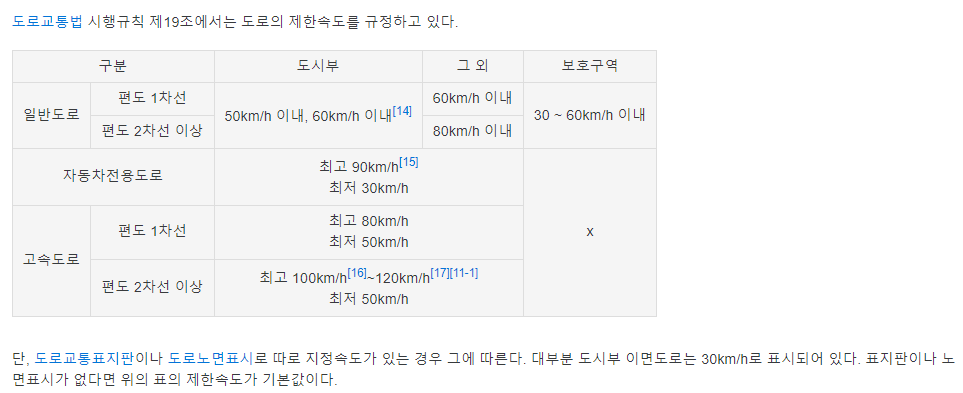

## 고속국도 (고속도로) 
한국도로공사_고속도로_제한최고속도_220331.pdf 파일을 참고하여 값 채움

### 도로번호에 '고속'을 포함한 경우

In [21]:
highway = []
for i, m_row in main2.iterrows():
  if m_row['도로번호'] == None: continue
  if '고속' in str(m_row['도로번호']):
    highway.append(i)

In [22]:
print(len(highway))
print(highway)

58
[53, 54, 55, 56, 57, 66, 67, 68, 69, 74, 75, 76, 77, 101, 102, 117, 119, 121, 123, 144, 175, 179, 180, 199, 227, 228, 230, 232, 278, 279, 306, 307, 308, 309, 310, 311, 312, 313, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 349, 350, 351, 352, 353, 354, 355, 356, 374]


In [23]:
main2.iloc[highway][['도로명', '도로번호']]

,도로명,도로번호
53,남해선,(고속국도 10호선)
54,남해선,(고속국도 10호선)
55,남해선,(고속국도 10호선)
56,남해선,(고속국도 10호선)
57,남해선,(고속국도 10호선)
66,당진대전선,(고속국도 30호선)
67,당진대전선,(고속국도 30호선)
68,당진대전선,(고속국도 30호선)
69,당진대전선,(고속국도 30호선)
74,대구포항선,(고속국도 20호선)


In [29]:
# pdf 파일에서 직접 찾아 값을 넣어줌
main2.loc[main2['도로명'] == '남해선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '당진대전선', '최고제한속도(km/h)'] = 110
main2.loc[main2['도로명'] == '대구포항선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '동해선', '최고제한속도(km/h)'] = 100 # 따로 명시돼 있는 부산포항선이 아닌 동해선은 삼척속초선 뿐이므로 이에 따름
main2.loc[main2['도로명'] == '무안광주선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '부산포항선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 더 긴 구간의 제한 속도를 따름
main2.loc[main2['도로명'] == '서울양양선', '최고제한속도(km/h)'] = 100 # 특정 구간은 80이지만, 모두 차선 수가 편도 2차선 이상이므로 모두 100으로 저장
main2.loc[main2['도로명'] == '서천공주선', '최고제한속도(km/h)'] = 110 # 차선 수가 편도 2차선 이상이고, 가장 긴 구간의 제한속도가 110이므로 110으로 저장
main2.loc[main2['도로명'] == '서천공주선', '최고제한속도(km/h)'] = 110 # 차선 수가 편도 2차선 이상이고, 가장 긴 구간의 제한속도가 110이므로 110으로 저장
main2.loc[main2['도로명'] == '순천완주선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '영동선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '영암순천선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '익산장수선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '중부내륙선', '최고제한속도(km/h)'] = 110 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름
main2.loc[main2['도로명'] == '중부선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름
main2.loc[main2['도로명'] == '중앙선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름
main2.loc[main2['도로명'] == '청주상주선', '최고제한속도(km/h)'] = 110
main2.loc[main2['도로명'] == '평택제천선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '호남선', '최고제한속도(km/h)'] = 100
main2.loc[main2['도로명'] == '서해안선', '최고제한속도(km/h)'] = 110 # 구간별로 달라 더 긴 구간의 제한 속도를 따름

In [30]:
main2.iloc[highway]['최고제한속도(km/h)'].isna().sum()

0

=> 결측치 없으므로 완료 !

### 도로명에 '고속'을 포함한 경우

In [32]:
highway2 = []
for i, m_row in main2.iterrows():
  if m_row['도로명'] == None: continue
  if '고속' in str(m_row['도로명']):
    highway2.append(i)

In [34]:
main2.iloc[highway2]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
97,1516,37.33661,126.97317,서수원∼의왕간고속화도로 지방도,309호선,왕복6~8차선,NaN
116,1138,35.06678,126.58747,무안광주고속도로,12호선,왕복4차선,NaN
233,1440,34.80761,127.15794,고속국도,10호선,왕복4차선,NaN
292,1517,37.31723,126.96639,서수원∼의왕간고속화도로 지방도,309호선,왕복6~8차선,NaN
383,1547,37.78822,128.12467,고속도로,60,왕복4차선,NaN
385,1546,37.75767,128.01514,고속도로,60,왕복4차선,NaN
435,1013,36.28339,127.38732,대전남부순환고속도로,남부순환도로,왕복4차선,NaN
437,1559,35.68328,129.18131,고속,1,왕복4차선,NaN
441,1133,34.98639,127.58556,남해고속도로,NaN,왕복4차선,NaN
456,1554,35.47802,127.54584,고속,12,왕복4차선,NaN


In [38]:
main2.loc[[97, 292], '최고제한속도(km/h)'] = 60 # 지방도에 속함 (https://namu.wiki/w/309%EB%B2%88%20%EC%A7%80%EB%B0%A9%EB%8F%84) # 편도 2차선 이상인 일반도로이고 여러 정보를 취합한 결과 60으로 결정
main2.loc[[116, 233, 456], '최고제한속도(km/h)'] = 100 # 고속국도 10번, 12번은 모두 최고제한속도가 100
main2.loc[[383, 385], '최고제한속도(km/h)'] = 100 # 일부 구간은 80이나, 대부분의 구간이 100이므로 100으로 저장
main2.loc[435, '최고제한속도(km/h)'] = 100 # 고속국도 300번 대전남부순환선의 최고제한속도는 100
main2.loc[437, '최고제한속도(km/h)'] = 100 # 가장 긴 구간의 제한속도를 따름
main2.loc[441, '최고제한속도(km/h)'] = 100 # 남해선의 가장 긴 구간의 제한속도를 따름

In [39]:
main2.iloc[highway2]['최고제한속도(km/h)'].isna().sum()

0

=> 결측치 없으므로 완료 !

### 도로명이 고속국도 이름인 것 같은 경우

In [40]:
main2[(main2['도로명'] == '광주대구선 125.8k') | (main2['도로명'] == '광주대구선') | (main2['도로명'] == '동해선') |
      (main2['도로명'] == '무안광주선') | (main2['도로명'] == '서부순환로') | (main2['도로명'] == '서울양양선') |
      (main2['도로명'] == '순천완주선') | (main2['도로명'] == '영암순천선') | (main2['도로명'] ==  '남부순환로') | 
      (main2['도로명'] == '남부대로') | (main2['도로명'] == '동부순환도로') | (main2['도로명'] ==  '군현∼연정')]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
28,1460,35.70748,127.96741,광주대구선 125.8k,12,왕복4차선,NaN
29,1462,35.36617,127.12414,광주대구선,제12호선,왕복4차선,NaN
30,1466,35.38675,127.24964,광주대구선,제12호선,왕복4차선,NaN
31,1464,35.42317,127.36178,광주대구선,제12호선,왕복4차선,NaN
32,1465,35.47836,127.56028,광주대구선,제12호선,왕복4차선,NaN
33,1467,35.54294,127.69214,광주대구선,제12호선,왕복4차선,NaN
98,1519,38.12875,128.57922,동해선,65,왕복4차선,100.0
99,1520,38.15042,128.58506,동해선,65,왕복4차선,100.0
100,1518,37.50025,129.09139,동해선,65,왕복4차선,100.0
101,1362,37.69003,128.91754,동해선,(고속국도 65호선),왕복4차선,100.0


In [41]:
# 광주대구선 고속도로 최고제한속도는 100
main2.loc[28:34, '최고제한속도(km/h)'] = 100

=> 서부순환로, 남부순환로, 남부대로, 동부순환도로, 군현~연정은 모두 일반국도로 아래에서 처리

## 일반국도 (고속도로 이외 도로)
일반국도 : 국도, 지방도, 시도, 구도, 군도 등 \
*[국도](https://namu.wiki/w/%EA%B5%AD%EB%8F%84)는 고속국도와 일반국도로 분류되지만, 고속국도는 보통 고속도로로 칭하고 일반적으로는 일반국도만을 '국도'라고 부른다. 

In [42]:
main2['최고제한속도(km/h)'].isna().sum()

407

In [43]:
general = main2[main2['최고제한속도(km/h)'].isna()] # 고속도로 이외 일반도로
general

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
0,1495,35.36019,128.06375,일반국도,20호선,왕복4차선,NaN
1,1277,37.03408,128.40661,국도,59호선,왕복2차선,NaN
2,1278,36.89832,128.30563,국도,59호선,왕복2차선,NaN
3,1279,36.89687,128.30581,국도,59호선,왕복2차선,NaN
4,1090,36.71051,127.42222,지방도,540호,왕복6차선,NaN
...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,과학산업2로,구룡리 472도,왕복6차선,NaN
493,1087,36.71722,127.41778,오창공원로,구룡리 442도,왕복4차선,NaN
494,1088,36.71222,127.42528,오창공원로,양청리 882도(호수공원 주변),왕복4차선,NaN
495,1091,36.76750,127.47333,리도,213호선,왕복2차선,NaN


In [44]:
general['도로명'].unique()

array(['일반국도', '국도', '지방도', nan, '갈매동 산 69-183', '군도', '갈사만진입도로', '국지도',
       '개좌로', '계룡대로', '범안로', '지방도 ', '소로1-11', '충절로', '구항길', '민락로',
       '농어촌도로', '신평화로', '하면~일동', '논현로', '시도', '국도 ', '돌마로', '만덕고갯길',
       '농어촌101호선', '국대도', '금하로', '후광대로', '-', '서부순환로', '아차산로', '현동로',
       '산115', '서원구', '논고개로', '태조산', '신단로', '위임국도', '앵고개로', '부흥로',
       '천성대항길', '대로', '예천군 호명면 종산리 산46-1', '남부순환로', '농어촌', '충무로72번길',
       '신월로', '원적로', '공단', '상원사진입도로', '은봉로', '낙동남로', '하능마을로', '남부대로',
       '동일로', '계남큰길', '지방산업단지진입도로', '경명로', '어하고개로', '북부산업로', '보삼길', '시청로',
       '학령로', '516로', '마을진입로', '현문로', '중로', '학고개터널', '도시계획도로소', '원설로',
       '군도6호', '1002호선', '행암로', '다산산단로', '봉산로', '동부순환도로', '산동-고달간',
       '산동고달간', '농어촌도', '516도로', '평화로', '1100도로', '국도대체우회도로', '금성',
       '대(보)', '소로2-5', '사담선', '군현∼연정', '면도', '매봉로', '구룡산로', '안뜸로',
       '1순환로', '과학산업2로', '오창공원로', '리도'], dtype=object)

### 도로명이 결측치인 경우

In [45]:
general[(general['도로명'] == None) | (general['도로명'] == '-')]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
146,1506,37.19361,126.95028,-,-,왕복4차선,NaN
221,1063,37.29661,127.05875,-,-,왕복16차선,NaN
236,1018,37.35452,127.16786,-,57호선,왕복4차선,NaN


=> 차선 수에 기반해 아래에서 처리

### 일반국도는 **차선 수**에 기반해 최고제한속도 저장
* 일반도로 (보통의 경우)
  * 편도 1차로 → 60km/h 이내
  * 편도 2차로 이상 → 80km/h 이내

참고 : [도로교통공단 - 법정 속도](https://www.koroad.or.kr/kp_web/knCarSafe1-03.do)

In [47]:
general['차선_수'].unique()

array(['왕복4차선', '왕복2차선', '왕복6차선', '왕복8차선', '하천횡단', '왕복 1 차선', '왕복 6 차선',
       '왕복3차선', '왕복5', '왕복5차선', '왕복16차선', '왕복1차선', '왕복6차로', '2차선',
       '왕복7차선', '왕복12차선', '왕복3차선(오르막차로1차로포함)', '1차로', '하부 왕복 6차선'],
      dtype=object)

#### 편도 2차로 미만인 경우

In [48]:
general[(general['차선_수'] == '왕복2차선') | (general['차선_수'] == '왕복 1 차선') |
        (general['차선_수'] == '왕복3차선') | (general['차선_수'] == '왕복1차선') | 
        (general['차선_수'] == '2차선') | (general['차선_수'] == '왕복3차선(오르막차로1차로포함)') |
        (general['차선_수'] == '1차로')]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
1,1277,37.03408,128.40661,국도,59호선,왕복2차선,NaN
2,1278,36.89832,128.30563,국도,59호선,왕복2차선,NaN
3,1279,36.89687,128.30581,국도,59호선,왕복2차선,NaN
5,1023,37.41972,127.18750,NaN,389,왕복2차선,NaN
7,1453,36.40691,129.04714,군도,금곡2-신흥,왕복2차선,NaN
...,...,...,...,...,...,...,...
486,1080,36.60484,127.54735,면도,106호선,왕복2차선,NaN
487,1081,36.67299,127.66779,면도,101호선,왕복2차선,NaN
488,1482,36.62409,127.47784,매봉로,매봉로,왕복2차선,NaN
490,1084,36.61426,127.48109,안뜸로,47,왕복2차선,NaN


In [50]:
less2_idx = general[(general['차선_수'] == '왕복2차선') | (general['차선_수'] == '왕복 1 차선') |
                    (general['차선_수'] == '왕복3차선') | (general['차선_수'] == '왕복1차선') | 
                    (general['차선_수'] == '2차선') | (general['차선_수'] == '왕복3차선(오르막차로1차로포함)') |
                    (general['차선_수'] == '1차로')].index
less2_idx

Int64Index([  1,   2,   3,   5,   7,   9,  10,  12,  13,  14,
            ...
            481, 482, 483, 484, 485, 486, 487, 488, 490, 495],
           dtype='int64', length=224)

In [51]:
main2.loc[less2_idx, '최고제한속도(km/h)'] = 60
main2.loc[less2_idx]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
1,1277,37.03408,128.40661,국도,59호선,왕복2차선,60.0
2,1278,36.89832,128.30563,국도,59호선,왕복2차선,60.0
3,1279,36.89687,128.30581,국도,59호선,왕복2차선,60.0
5,1023,37.41972,127.18750,NaN,389,왕복2차선,60.0
7,1453,36.40691,129.04714,군도,금곡2-신흥,왕복2차선,60.0
...,...,...,...,...,...,...,...
486,1080,36.60484,127.54735,면도,106호선,왕복2차선,60.0
487,1081,36.67299,127.66779,면도,101호선,왕복2차선,60.0
488,1482,36.62409,127.47784,매봉로,매봉로,왕복2차선,60.0
490,1084,36.61426,127.48109,안뜸로,47,왕복2차선,60.0


#### 나머지 - 편도 2차선 이상 도로

In [52]:
main2[main2['최고제한속도(km/h)'].isna()]

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
0,1495,35.36019,128.06375,일반국도,20호선,왕복4차선,NaN
4,1090,36.71051,127.42222,지방도,540호,왕복6차선,NaN
6,1527,37.61974,127.11887,갈매동 산 69-183,도로명미부여,왕복4차선,NaN
8,1515,34.97735,127.81174,갈사만진입도로,3호선,왕복4차선,NaN
11,1060,37.28256,127.05281,지방도,1,왕복8차선,NaN
...,...,...,...,...,...,...,...
491,1481,36.62239,127.46730,1순환로,1순환로,왕복6차선,NaN
492,1089,36.71278,127.42056,과학산업2로,구룡리 472도,왕복6차선,NaN
493,1087,36.71722,127.41778,오창공원로,구룡리 442도,왕복4차선,NaN
494,1088,36.71222,127.42528,오창공원로,양청리 882도(호수공원 주변),왕복4차선,NaN


In [53]:
main2['최고제한속도(km/h)'].fillna(80, inplace=True)

In [54]:
main2

,번호,위도,경도,도로명,도로번호,차선_수,최고제한속도(km/h)
0,1495,35.36019,128.06375,일반국도,20호선,왕복4차선,80.0
1,1277,37.03408,128.40661,국도,59호선,왕복2차선,60.0
2,1278,36.89832,128.30563,국도,59호선,왕복2차선,60.0
3,1279,36.89687,128.30581,국도,59호선,왕복2차선,60.0
4,1090,36.71051,127.42222,지방도,540호,왕복6차선,80.0
...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,과학산업2로,구룡리 472도,왕복6차선,80.0
493,1087,36.71722,127.41778,오창공원로,구룡리 442도,왕복4차선,80.0
494,1088,36.71222,127.42528,오창공원로,양청리 882도(호수공원 주변),왕복4차선,80.0
495,1091,36.76750,127.47333,리도,213호선,왕복2차선,60.0


In [55]:
main2['최고제한속도(km/h)'].isna().sum()

0

## 최종 데이터

In [59]:
df = main2[['번호', '최고제한속도(km/h)']]
df

,번호,최고제한속도(km/h)
0,1495,80.0
1,1277,60.0
2,1278,60.0
3,1279,60.0
4,1090,80.0
...,...,...
492,1089,80.0
493,1087,80.0
494,1088,80.0
495,1091,60.0


## RDS에 데이터 업로드

In [58]:
table = load_data_from_rds('변수관계설정', db_connection)
table

,번호,등산로까지 최단거리(km),식생,경사도,지형기호(2.3km),주변 동물종 개수,주변동물 출현빈도,주변 로드킬 빈도,산책로까지의 최단 거리(km)
0,1001,1.903039,0,6,X,NaN,NaN,0,237.040073
1,1002,0.120319,1,5,X,4.0,4.0,0,122.055124
2,1004,0.047211,1,2,산지,1.0,1.0,0,125.516218
3,1005,0.233820,1,2,X,4.0,4.0,0,128.701343
4,1006,2.172428,0,4,하천,3.0,3.0,0,103.572133
...,...,...,...,...,...,...,...,...,...
492,1561,0.000416,1,2,산지,3.0,5.0,4,219.634740
493,1562,2.835246,1,5,산지,6.0,27.0,0,38.432601
494,1564,0.886170,1,4,X,1.0,1.0,0,248.086515
495,1567,9.125829,1,5,하천,4.0,5.0,0,283.374921


In [60]:
table = table.merge(df, on='번호')
table

,번호,등산로까지 최단거리(km),식생,경사도,지형기호(2.3km),주변 동물종 개수,주변동물 출현빈도,주변 로드킬 빈도,산책로까지의 최단 거리(km),최고제한속도(km/h)
0,1001,1.903039,0,6,X,NaN,NaN,0,237.040073,80.0
1,1002,0.120319,1,5,X,4.0,4.0,0,122.055124,60.0
2,1004,0.047211,1,2,산지,1.0,1.0,0,125.516218,60.0
3,1005,0.233820,1,2,X,4.0,4.0,0,128.701343,80.0
4,1006,2.172428,0,4,하천,3.0,3.0,0,103.572133,80.0
...,...,...,...,...,...,...,...,...,...,...
492,1561,0.000416,1,2,산지,3.0,5.0,4,219.634740,60.0
493,1562,2.835246,1,5,산지,6.0,27.0,0,38.432601,80.0
494,1564,0.886170,1,4,X,1.0,1.0,0,248.086515,80.0
495,1567,9.125829,1,5,하천,4.0,5.0,0,283.374921,60.0


In [61]:
upload_data_to_rds(table, '변수관계설정', db_connection)